# Découverte des variables

<mark>TODO</mark> : ajuster le rédactionnel cf. le slides.

Organisation des variables par groupes et sous-groupes sémantiques :
* **Identification** : identité du relevé de consommation (donc de l'immeuble concerné par le relevé).
* **Location** : localisation spatiale administrative et physique (coordonnées GPS) de l'immeuble.
* **Structure** : forme et dimensions du lot et de la construction, ancienneté.
* **Use types** : destinations principale et secondaires du bien.
* **Scoring** : évaluation ENERGYSTAR du bien.
* **Consumption** : consommation énergétique du bien (en volume, intensité et qualité).
* **Meta** : données sur les données (données extrapolées, conformité, outliers).
* **GHGE emissions** : émission de GES.

# Chargements

## Libs

In [1]:
from pepper_commons import *
from pepper_monovar import *

✔ _data loaded
✔ struct loaded


## Dataset

Data source : https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

In [2]:
data = get_data()
display(data)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


# Informations de base

## Structure

In [3]:
print_subtitle('basic infos')
print(bold('dimensions'), ':', data.shape)
print(bold('size'), ':', *format_iB(getsizeof(data)))
print(bold('info'), ':')
data.info()


basic infos
dimensions : (3376, 46)
size : 3.776 MiB
info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood         

## Description

In [4]:
print_subtitle('basic stats')
data.describe(include='all').T


basic stats


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
OSEBuildingID,3376.0,NaN,NaN,NaN,21208.991114,12223.757015,1.0,19990.75,23112.0,25994.25,50226.0
DataYear,3376.0,NaN,NaN,NaN,2016.0,0.0,2016.0,2016.0,2016.0,2016.0,2016.0
BuildingType,3376,8,NonResidential,1460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrimaryPropertyType,3376,24,Low-Rise Multifamily,987,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PropertyName,3376,3362,Northgate Plaza,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,3376,3354,2600 SW Barton St,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,3376,1,Seattle,3376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,3376,1,WA,3376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZipCode,3360.0,NaN,NaN,NaN,98116.949107,18.615205,98006.0,98105.0,98115.0,98122.0,98272.0
TaxParcelIdentificationNumber,3376,3268,1625049001,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Production du dictionnaire des données

In [ ]:
import pepper_monovar as mono
from gspread_pandas import Spread
spread = Spread('1gtTOd-taN9aY8sg4PGY456E2AlsMxi2W_-7kZaCSYlA')       # target GSheet
data_on_data = mono.data_report(data, 'dataset_vars_analysis.csv')    # build the report dataframe
mono.data_report_to_gsheet(data_on_data, spread, 'data_dict')         # push it in the 'data_dict' sheet

En bonus sur ce projet un dataset de 'petite' taille (3K x 40) après deux projets bigdata.

Il est donc facile de le charger dans une GSheet pour le visualiser intégralement et opérer l'exploration et le feature engineering en environnement de développement de type tableur.

In [ ]:
from gspread_pandas import Spread

spread = Spread('1gtTOd-taN9aY8sg4PGY456E2AlsMxi2W_-7kZaCSYlA')    # target GSheet TODO : externaliser, spécif. user
as_code = ['OSEBuildingID', 'ZipCode', 'TaxParcelIdentificationNumber']
as_fr_FR = [c for c in data.columns if data[c].dtype == 'float64']
data_to_gsheet(data, spread, 'data', as_code, as_fr_FR)

# Variables d'identification

## Type d'immeuble (`BuildingType`)

**Déf**. *Classification des types de construction de la ville de Seattle.*

**NB** > le terme générique *type* serait ici à interpréter en termes de structre, de type de bâti, mais il recoupe évidemment fortement la connotation de *destination* (*usage*).

Ces 8 catégories ont cette structure interne et ces fréquences :
| cat | subcat | freq |
|-|-|-|
| NonResidential || 1546 |
|| NonResidential | 1460 |
|| Nonresidential COS | 85 |
|| Nonresidential WA | 1 |
| Multifamily | 1708 |
|| Multifamily LR (1-4) | 1018 |
|| Multifamily MR (5-9) | 580 |
|| Multifamily HR (10+) | 110 |
| Campus || 122 |
|| SPS-District K-12 | 98 |
|| Campus | 24 |

<mark>TODO</mark> : que signifiant COS, SPS-District, K-12 ?

Signification de LR, MR, HR (cf. modalités de `BuildingType`) :
* **Low-Rise** : immeubles de faible hauteur, de 1 à 4 étages.
* **Mid-Rise** : immeubles de hauteur intermédiaire, de 5 à 9 étages.
* **High-Rise** : immeubles de grande hauteur, de 10 étages et +.

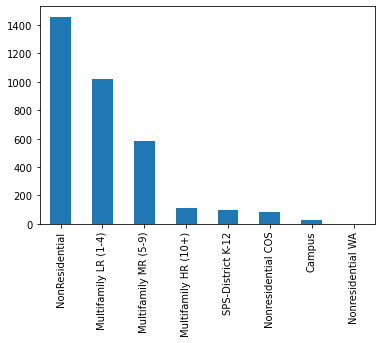

In [5]:
_ = cats_freqs(data, 'BuildingType')

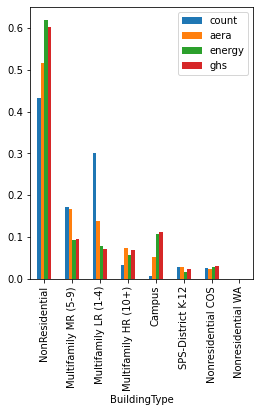

In [6]:
_ = cats_weighted_freqs(data, 'BuildingType',
        ['PropertyGFATotal', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions'],
        ['aera', 'energy', 'ghs']
    )

## Utilisation principale (`PrimaryPropertyType`)

**Déf**. *L'utilisation principale d'une propriété (par exemple, bureau, magasin de détail). L'utilisation primaire est définie comme une fonction qui représente plus de 50% d'une propriété. Il s'agit du champ Calculé de type propriété - EPA à partir du gestionnaire de portefeuille.*

Destination de la construction.

**NB** > subdivision de la propriété précédente.

Cela a évidemment un impact. Il y a ici des classes à former avec des distinctions à prévoir.


http://www.educationcareerjournal.com/job-types/k-12-teacher/

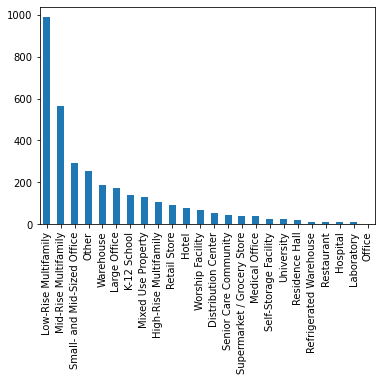

In [5]:
_ = cats_freqs(data, 'PrimaryPropertyType')

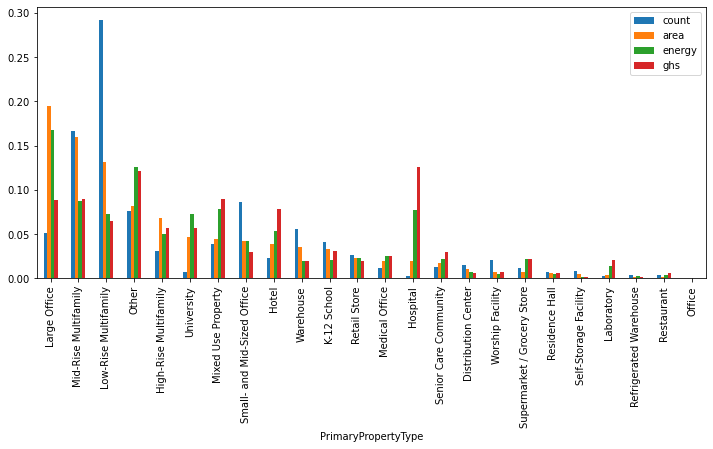

In [8]:
_ = cats_weighted_freqs(data, 'PrimaryPropertyType',
        ['PropertyGFATotal', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions'],
        ['area', 'energy', 'ghs']
    )

# Variables de situation

Localisation spatiale du bien : localisations administratives et localisation physique.

## Quartier (`Neighborhood`)

<mark>TODO Nice-to-have :</mark> représentation cartographique : quatiers avec couleurs.

Attention : il y a des variations de casse (BALLARD / Ballard, CENTRAL/Central) et même d'expression (Delridge, DELRIDGE, DELRIDGE NEIGHBORHOODS) pour désigner les mêmes quartiers : à normaliser pour la suite.

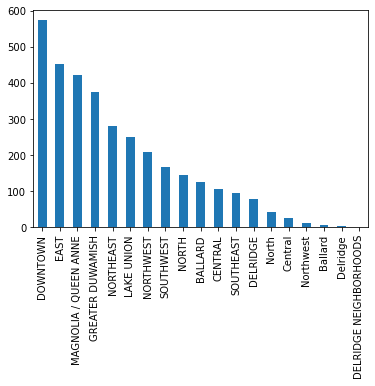

In [9]:
_ = cats_freqs(data, 'Neighborhood')

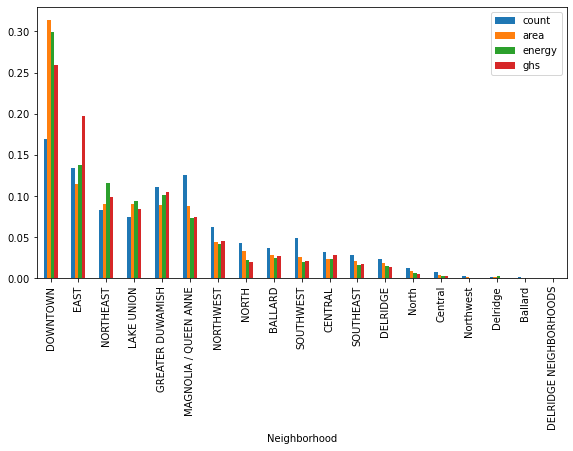

In [10]:
_ = cats_weighted_freqs(data, 'Neighborhood',
        ['PropertyGFATotal', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions'],
        ['area', 'energy', 'ghs']
    )

# Variables de structure et surfaces principales

## Année de construction (`YearBuilt`)

Cette caractéristique est probablement pertinente.

Les normes de construction évoluent dans le temps, et la prise de conscience des enjeux climatiques est récente en comparaison de l'âge probable de certaines constructions. Intuition à vérifier évidemment.

1900    55
1901     8
1902    11
1903     4
1904    15
        ..
2011    15
2012    35
2013    51
2014    67
2015    37
Name: YearBuilt, Length: 113, dtype: int64

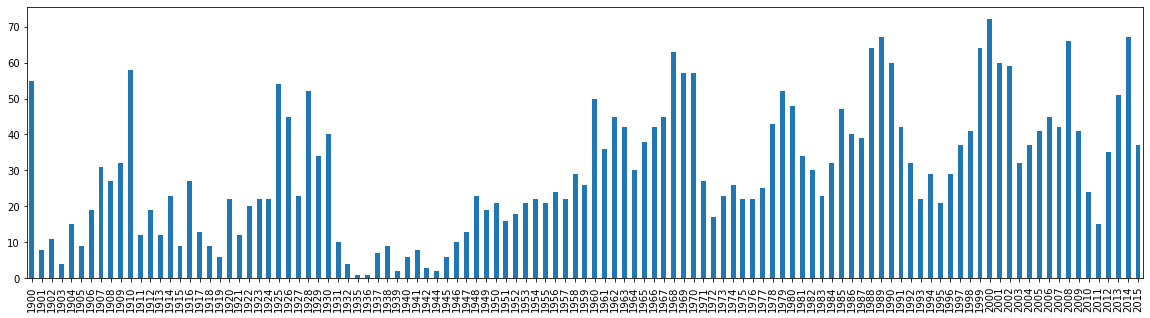

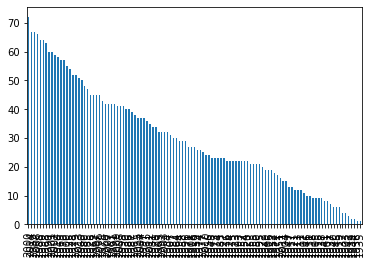

In [11]:
year_built = data.YearBuilt
yb_counts = year_built.value_counts().sort_index()
display(yb_counts)
yb_counts.plot.bar(figsize=(20, 5))
plt.show()
_ = cats_freqs(data, 'YearBuilt')

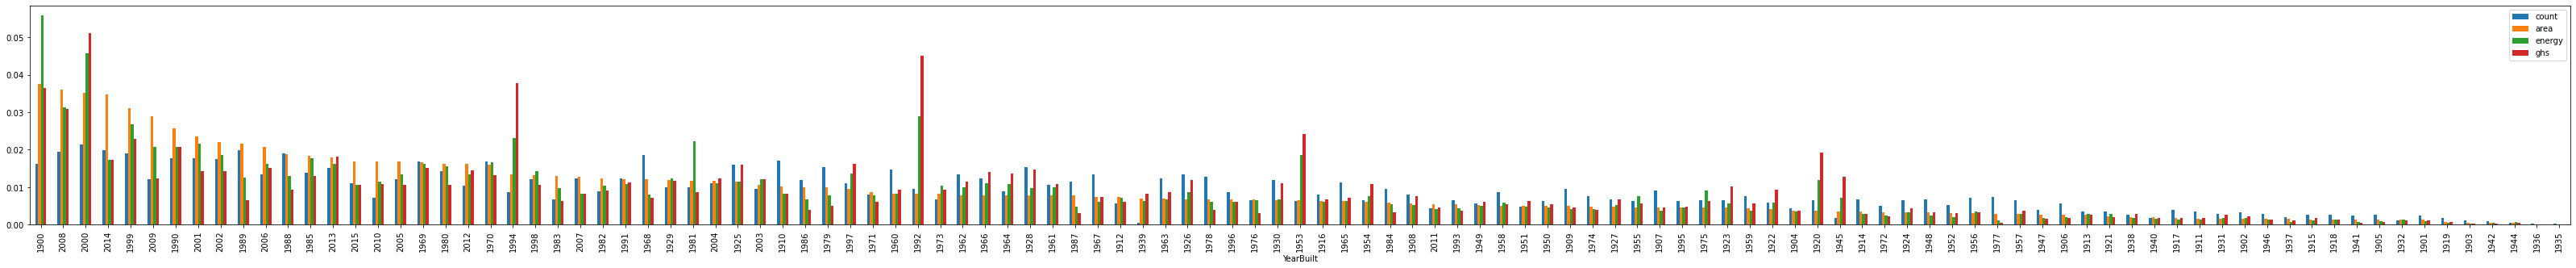

In [12]:
_ = cats_weighted_freqs(data, 'YearBuilt',
        ['PropertyGFATotal', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions'],
        ['area', 'energy', 'ghs']
    )

## Nombre de bâtiments (`NumberofBuildings`)

Modèle en longue traîne, la majorité des immeubles ne comptent qu'un bâtiment.

Le cas à 0 bâtiments pose question : investiguer.

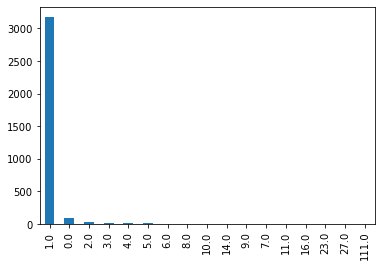

In [13]:
_ = cats_freqs(data, 'NumberofBuildings')

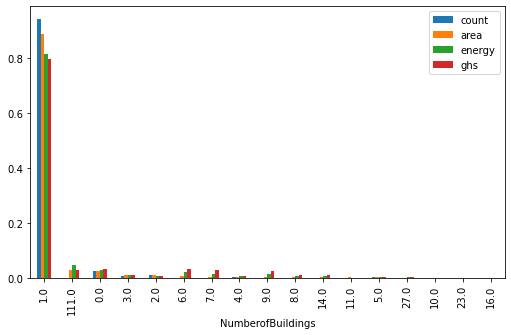

In [14]:
_ = cats_weighted_freqs(data, 'NumberofBuildings',
        ['PropertyGFATotal', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions'],
        ['area', 'energy', 'ghs']
    )

### Nombre d'étages (`NumberofFloors`)

Là, ça devient intéressant.

A l'intuition, cette propriété est un déterminant principal. A vérifier, évidemment.

Un nombre d'étage nul pose question.

<mark>TODO</mark> étudier la surface par étage

In [ ]:
label = 'se'
c = data_se[label]
display(c)

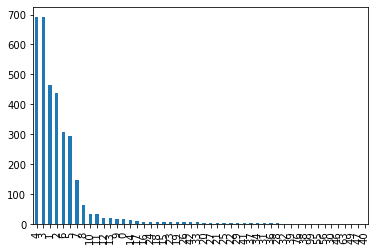

In [15]:
_ = cats_freqs(data, 'NumberofFloors')

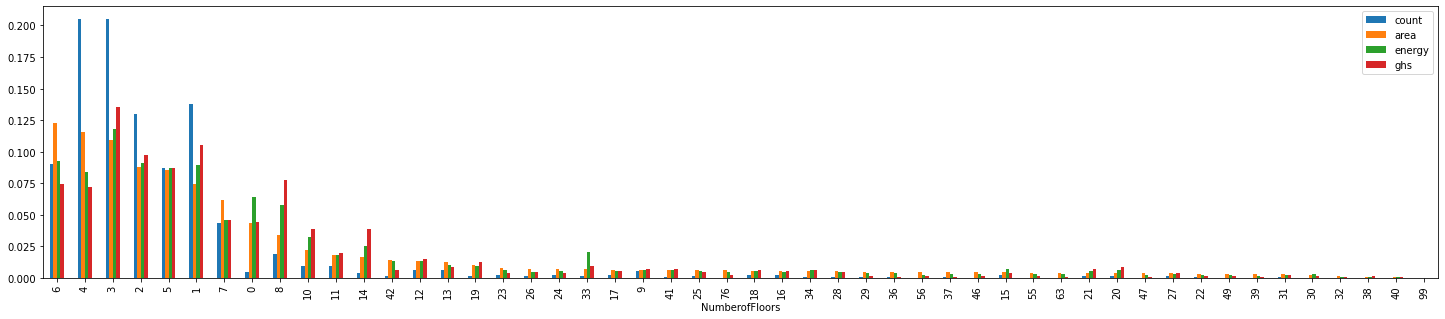

In [16]:
_ = cats_weighted_freqs(data, 'NumberofFloors',
        ['PropertyGFATotal', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions'],
        ['area', 'energy', 'ghs']
    )

### Surface par étage

En visualisant notamment un centre ville constitué principalement d'immeubles, cela donne une indication sur la base de l'immeuble et dégage l'amorce d'un dimensionnement du problème énergétique non plus relativement à une surface 2D, mais à un un volume 3D.

Il n'en sortira peut-être rien, mais il pourrait en sortir quelque chose de pertinent.

On supprime les cas à nombre d'étages NaN ou 0.

In [26]:
d = data[data.NumberofFloors.notna() & (data.NumberofFloors > 0)]
se = pd.Series(d['PropertyGFABuilding(s)'] / d.NumberofFloors, name='se')
data_se = pd.concat([d, se], axis=1)
display(data_se)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,se
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83,7369.500000
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86,8045.636364
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19,18521.756098
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67,6132.000000
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88,6310.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70,12294.000000
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01,16000.000000
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99,13157.000000
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57,14101.000000


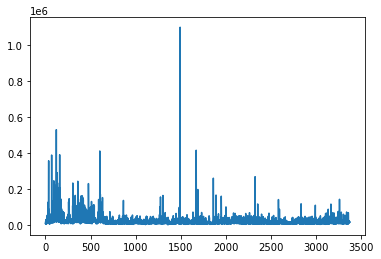

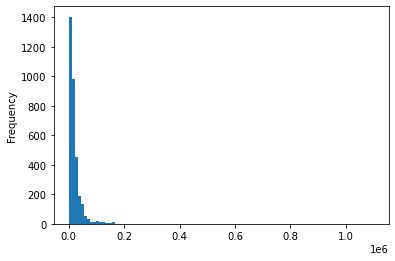

In [34]:
#_ = cats_freqs(data_se, 'se')
label = 'se'
c = data_se[label]
#display(c)
c.plot()
plt.show()
c.plot.hist(bins=100)
plt.show()

Outliers :

In [38]:
c = c.sort_values(ascending=False)
display(c)
display(data.loc[c.index])

1494    1.100000e+06
121     5.300390e+05
1672    4.156320e+05
603     4.115840e+05
158     3.907090e+05
            ...     
1826    3.126500e+03
1550    3.115200e+03
3046    2.766000e+03
1109    1.818000e+03
1359    2.216970e+02
Name: se, Length: 3360, dtype: float64

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
1494,22062,2016,Campus,University,Entire Campus,901 12th Avenue,Seattle,WA,98122.0,2254500880,...,1.807527e+07,61672821.0,529756.937500,52975694.0,False,NaN,Compliant,NaN,3243.48,1.47
121,194,2016,NonResidential,Retail Store,Northgate Mall,401 Northgate Way,Seattle,WA,98125.0,2926049025,...,4.755138e+06,16224529.0,114925.031300,11492503.0,False,NaN,Compliant,NaN,723.47,1.36
1672,23071,2016,NonResidential,Hospital,Main Hospital - All Wings,Facilities Management MS: B-120,Seattle,WA,98133.0,3026049130,...,1.256277e+07,42864158.0,560966.125000,56096612.0,False,NaN,Compliant,NaN,3278.11,7.89
603,805,2016,NonResidential,Distribution Center,Portside Distribution Center,4050 E. Marginal Way South,Seattle,WA,98134.0,7666207536,...,2.198679e+06,7501894.0,75896.851560,7589685.0,False,NaN,Compliant,NaN,455.39,1.11
158,249,2016,NonResidential,Other,Safeco Field,1250 First Avenue South,Seattle,WA,98134.0,7666206483,...,1.190574e+07,40622381.0,181389.203100,18138920.0,False,NaN,Compliant,NaN,1246.55,1.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826,23521,2016,Multifamily MR (5-9),Mid-Rise Multifamily,714 BELLEVUE,714 Bellevue Ave E,Seattle,WA,98102.0,7697980000,...,2.295453e+05,783209.0,0.000000,0.0,False,NaN,Compliant,NaN,5.46,0.22
1550,22371,2016,Multifamily HR (10+),High-Rise Multifamily,420 Melrose,420 Melrose Ave E,Seattle,WA,98102.0,2617480000,...,3.178414e+05,1084475.0,863.890015,86389.0,False,NaN,Compliant,NaN,12.15,0.39
3046,27984,2016,Multifamily MR (5-9),Mid-Rise Multifamily,OAKVIEW APTS,9514 STONE AVE N,Seattle,WA,98103.0,4310701280,...,2.704332e+05,922718.0,0.000000,0.0,True,NaN,Error - Correct Default Data,NaN,6.43,0.22
1109,20885,2016,NonResidential,Senior Care Community,Ballard Center,820 NW 95th Street,Seattle,WA,98117.0,1865400030,...,1.043779e+06,3561375.0,85873.437500,8587344.0,False,NaN,Compliant,NaN,480.90,13.88


## Surfaces intérieures et extérieures

#### Surfaces extérieures [de stationnement] (`PropertyGFAParking`)

<mark>TODO enquête</mark> Considérer qu'une surface dite de parking est en fait toute la surface extérieure est une interprétation à vérifier. Deux moyens : 1/ demande directe à Seattle 2/ vérifier ma théorie par exemple avec un campus.

property without parking : 2872
property with parking : 504


273     512608
307     407795
292     389860
229     368980
163     335109
         ...  
1511       756
3352       604
1615       415
1427       260
1450        38
Name: PropertyGFAParking, Length: 504, dtype: int64

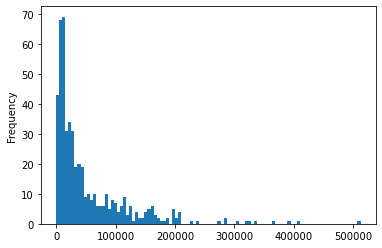

In [19]:
surface_pkg = data.PropertyGFAParking
# on vire les construction sans parking
no_parking = surface_pkg == 0
print('property without parking :', surface_pkg[no_parking].shape[0])
print('property with parking :', surface_pkg[~no_parking].shape[0])

surface_pkg = surface_pkg[~no_parking]

#nbf_counts = surface_pkg.value_counts()
#display(nbf_counts)
surface_pkg.plot.hist(bins=100)
display(surface_pkg.sort_values(ascending=False))

#### Surfaces intérieures (`PropertyGFABuilding(s)`)

property without building : 0
property with building : 3376


3274    9320156
1494    2200000
618     1765970
559     1632820
490     1592914
         ...   
3361      11685
432       11440
3363      11285
830       10925
1109       3636
Name: PropertyGFABuilding(s), Length: 3376, dtype: int64

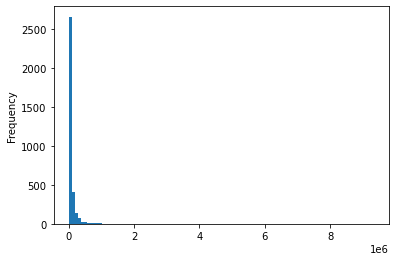

In [21]:
surface_bdg = data['PropertyGFABuilding(s)']
# on vire les constructions sans parking
no_builing = surface_bdg == 0
print('property without building :', surface_bdg[no_builing].shape[0])
print('property with building :', surface_bdg[~no_builing].shape[0])

surface_bdg = surface_bdg[~no_builing]

#nbf_counts = surface_pkg.value_counts()
#display(nbf_counts)
surface_bdg.plot.hist(bins=100)
display(surface_bdg.sort_values(ascending=False))

#### Relation entre les deux..

.. et implication sur la nature des immeubles et leur classification.


13/09 - je n'ai pas pris les bonnes classes : démarrer avec BuildingType

D'abord la proportion respective building / parking

Un scatter (relplot)

Puis on prend en considération la conso d'énergie dans chacun des 3 types et au total

Les classes (hue) sont d'abord les types de destinations (usages) --> multifacet

In [22]:
cols = [
    'PrimaryPropertyType', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
    'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)'
]

new_cols = ['type', 'area_pkg', 'area_bdg', 'btu_total', 'btu_steam', 'btu_elec', 'btu_gas']
_data = data[cols]
_data.columns = new_cols

display(_data)

,type,area_pkg,area_bdg,btu_total,btu_steam,btu_elec,btu_gas
0,Hotel,0,88434,7.226362e+06,2003882.00,3.946027e+06,1.276453e+06
1,Hotel,15064,88502,8.387933e+06,0.00,3.242851e+06,5.145082e+06
2,Hotel,196718,759392,7.258702e+07,21566554.00,4.952666e+07,1.493800e+06
3,Hotel,0,61320,6.794584e+06,2214446.25,2.768924e+06,1.811213e+06
4,Hotel,62000,113580,1.417261e+07,0.00,5.368607e+06,8.803998e+06
...,...,...,...,...,...,...,...
3371,Office,0,12294,8.497457e+05,0.00,5.242709e+05,3.254750e+05
3372,Other,0,16000,9.502762e+05,0.00,3.965461e+05,5.537300e+05
3373,Other,0,13157,5.765898e+06,0.00,1.792159e+06,3.973739e+06
3374,Mixed Use Property,0,14101,7.194712e+05,0.00,3.488702e+05,3.706010e+05


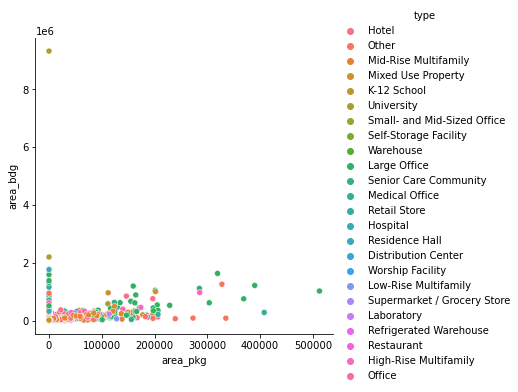

In [23]:
import seaborn as sns

sns.relplot(data=_data, x='area_pkg', y='area_bdg', hue='type')

# Qualification des usages (destinations des immeubles)

... traité ci-après dans classification

# Score ENERGYSTAR

Attention, seul 75 % des bâtiments disposent d'un score ENERGYSTAR (en la variable `'ENERGYSTARScore'`).

La variable `'YearsENERGYSTARCertified'` est peu pertinente, puisqu'elle n'est renseignée que pour 3,5 % de bâtiments.

Elle se présente sous la forme d'une liste numérique d'années en format AAAA directement juxatposées (contigües sans séparateur). Nous l'analysons rapidement ci-après, mais le traitement de cette colonne va consister à la supprimer. 

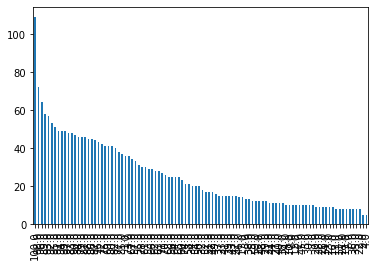

In [6]:
_ = cats_freqs(data, 'ENERGYSTARScore')

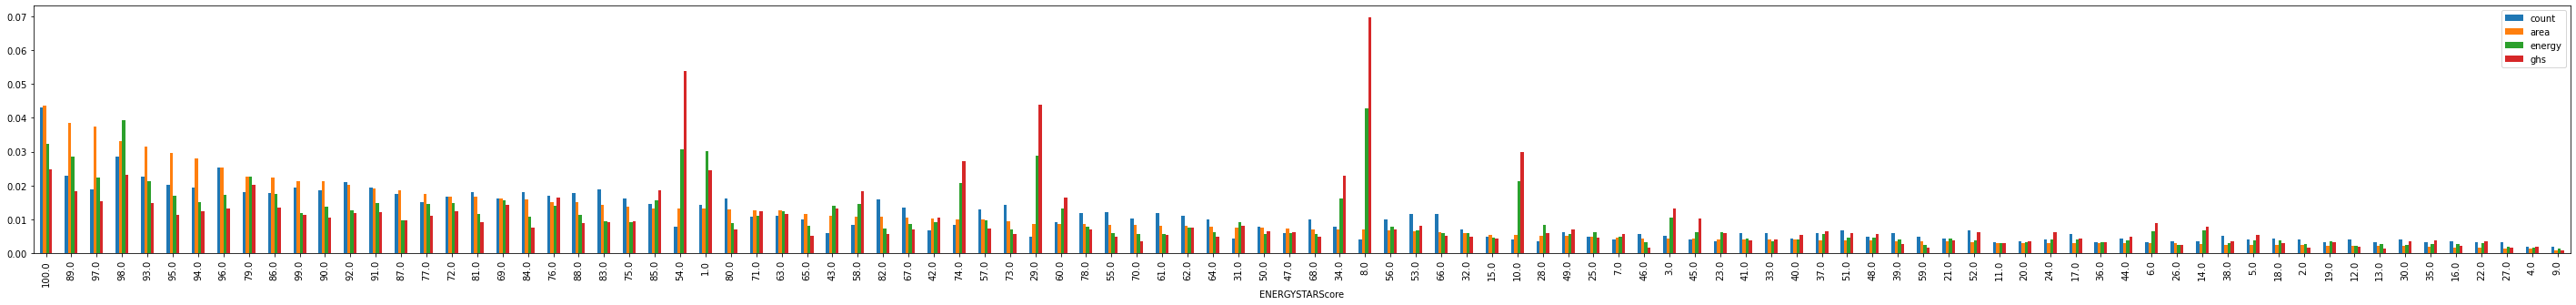

In [7]:
_ = cats_weighted_freqs(data, 'ENERGYSTARScore',
        ['PropertyGFATotal', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions'],
        ['area', 'energy', 'ghs']
    )

<AxesSubplot:ylabel='Frequency'>

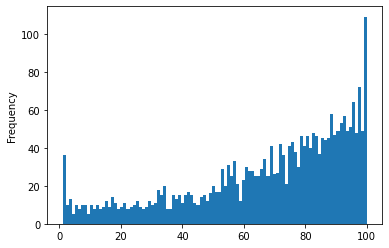

In [9]:
data.ENERGYSTARScore.plot.hist(bins=100)

# Variables de consommation (et production) énergétique

# Emission de GES (`TotalGHGEmissions`, `GHGEmissionsIntensity`)

## Méta-données (`DefaultData`, `ComplianceStatus`, `Outlier`, `Comments`)